<a href="https://colab.research.google.com/github/Jorgeduardo13/AutoArima-Time-Series-Blog/blob/master/Challenge_1_Sistemas_Inteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importar librerias

In [ ]:
import sys
# Pandas Profiling
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip uninstall pandas_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# Auto Keras
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
!pip install autokeras

!pip install missingpy
! pip install shap

!pip install graphviz
!pip install ann_visualizer

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Found existing installation: pandas-profiling 1.4.1
Uninstalling pandas-profiling-1.4.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-1.4.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? y
  Successfully uninstalled pandas-profiling-1.4.1
     - 34.6 MB 622 kB/s
     |████████████████████████████████| 10.1 MB 6.0 MB/s 
     |████████████████████████████████| 636 kB 57.9 MB/s 
     |████████████████████████████████| 102 kB 72.9 MB/s 
     |████████████████████████████████| 675 kB 55.3 MB/s 
     |████████████████████████████████| 3.1 MB 30.6 MB/s 
     |████████████████████████████████| 62 kB 959 kB/s 
     |████████████████████████████████| 812 kB 59.6 MB/s 
     |████████████████████████████████| 28.5 MB 49 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=48a135a542

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Resumen de los datos 
from pandas_profiling import ProfileReport

#Plotly
import plotly.offline as py #visualization
import plotly.graph_objs as go
from plotly.offline import *

# AutoKeras
from autokeras import StructuredDataClassifier
from sklearn.model_selection import train_test_split

# Estandarizacion MinMax
from sklearn.preprocessing import MinMaxScaler
# Imputador datos faltantes
from missingpy import MissForest

# Librerias ML
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import preprocessing

import shap

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



## Lectura de datos

In [ ]:
dataset=pd.read_csv(r'/content/drive/MyDrive/Sistemas Inteligentes/train.csv')
df=dataset.copy()

## Resumen sencillo

In [ ]:
summary=ProfileReport(dataset, title="Resumen Informacion",explorative=True)

In [ ]:
summary.to_file("/content/drive/MyDrive/Sistemas Inteligentes/EDA_Basico.html")

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

##Preparacion datos

### Seleccion de variables

In [ ]:
cols=['Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature']

miss_cols=['instrumentalness','Popularity']
target_col = "Class"

In [ ]:
class_mapping={0:'Rock', 1:'Indie', 2:'Alt', 3:'Pop',4: 'Metal', 5:'HipHop',6: 'Alt_Music', 7:'Blues',
               8:'Acoustic/Folk', 9:'Instrumental', 10:'Country',11: 'Bollywood'}
dataset['Class_name']=dataset['Class']
dataset=dataset.replace({"Class_name": class_mapping})           

In [ ]:
dataset['Class_name'].value_counts(normalize=True)

Country          0.275006
Alt_Music        0.143754
Instrumental     0.140253
Acoustic/Folk    0.103023
HipHop           0.080407
Indie            0.076295
Alt              0.070682
Rock             0.034730
Blues            0.032007
Pop              0.022338
Metal            0.021505
Name: Class_name, dtype: float64

### Estandarizacion

In [ ]:

scaler = MinMaxScaler()
for col in cols:
  dataset[col] = scaler.fit_transform(dataset[col].values.reshape(-1,1))

### Datos Faltantes

In [ ]:
imputer = MissForest()
X = dataset[cols]
X_imputed = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


In [ ]:
artistas_null=dataset[dataset['Popularity'].isnull()]['Track Name'].to_list()

In [ ]:
dataset[dataset['Track Name'].isin(artistas_null)]

Artist Name  ...     Class_name
25     IndianRaga, Akshay Anantapadmanabhan, Madhu Iy...  ...           Rock
43                              Lilly Wood and The Prick  ...      Alt_Music
51                                             How Lucky  ...           Rock
87                                                 Drake  ...   Instrumental
95                                           The Beatles  ...           Rock
...                                                  ...  ...            ...
17876                                            pg.lost  ...  Acoustic/Folk
17879                                                M83  ...      Alt_Music
17885                         Marshmello, Jonas Brothers  ...   Instrumental
17912                                        Hype Lights  ...        Country
17931                                           Westlife  ...   Instrumental

[527 rows x 18 columns]

In [ ]:
dataset[cols]=pd.DataFrame(X_imputed,columns=cols)
dataset

Artist Name  ...     Class_name
0                 Bruno Mars  ...         HipHop
1                     Boston  ...        Country
2              The Raincoats  ...      Alt_Music
3                       Deno  ...         HipHop
4      Red Hot Chili Peppers  ...        Country
...                      ...  ...            ...
17991            Green-House  ...      Alt_Music
17992               Micatone  ...            Alt
17993        Smash Hit Combo  ...  Acoustic/Folk
17994                Beherit  ...  Acoustic/Folk
17995         The Raconteurs  ...        Country

[17996 rows x 18 columns]

## Graficas 

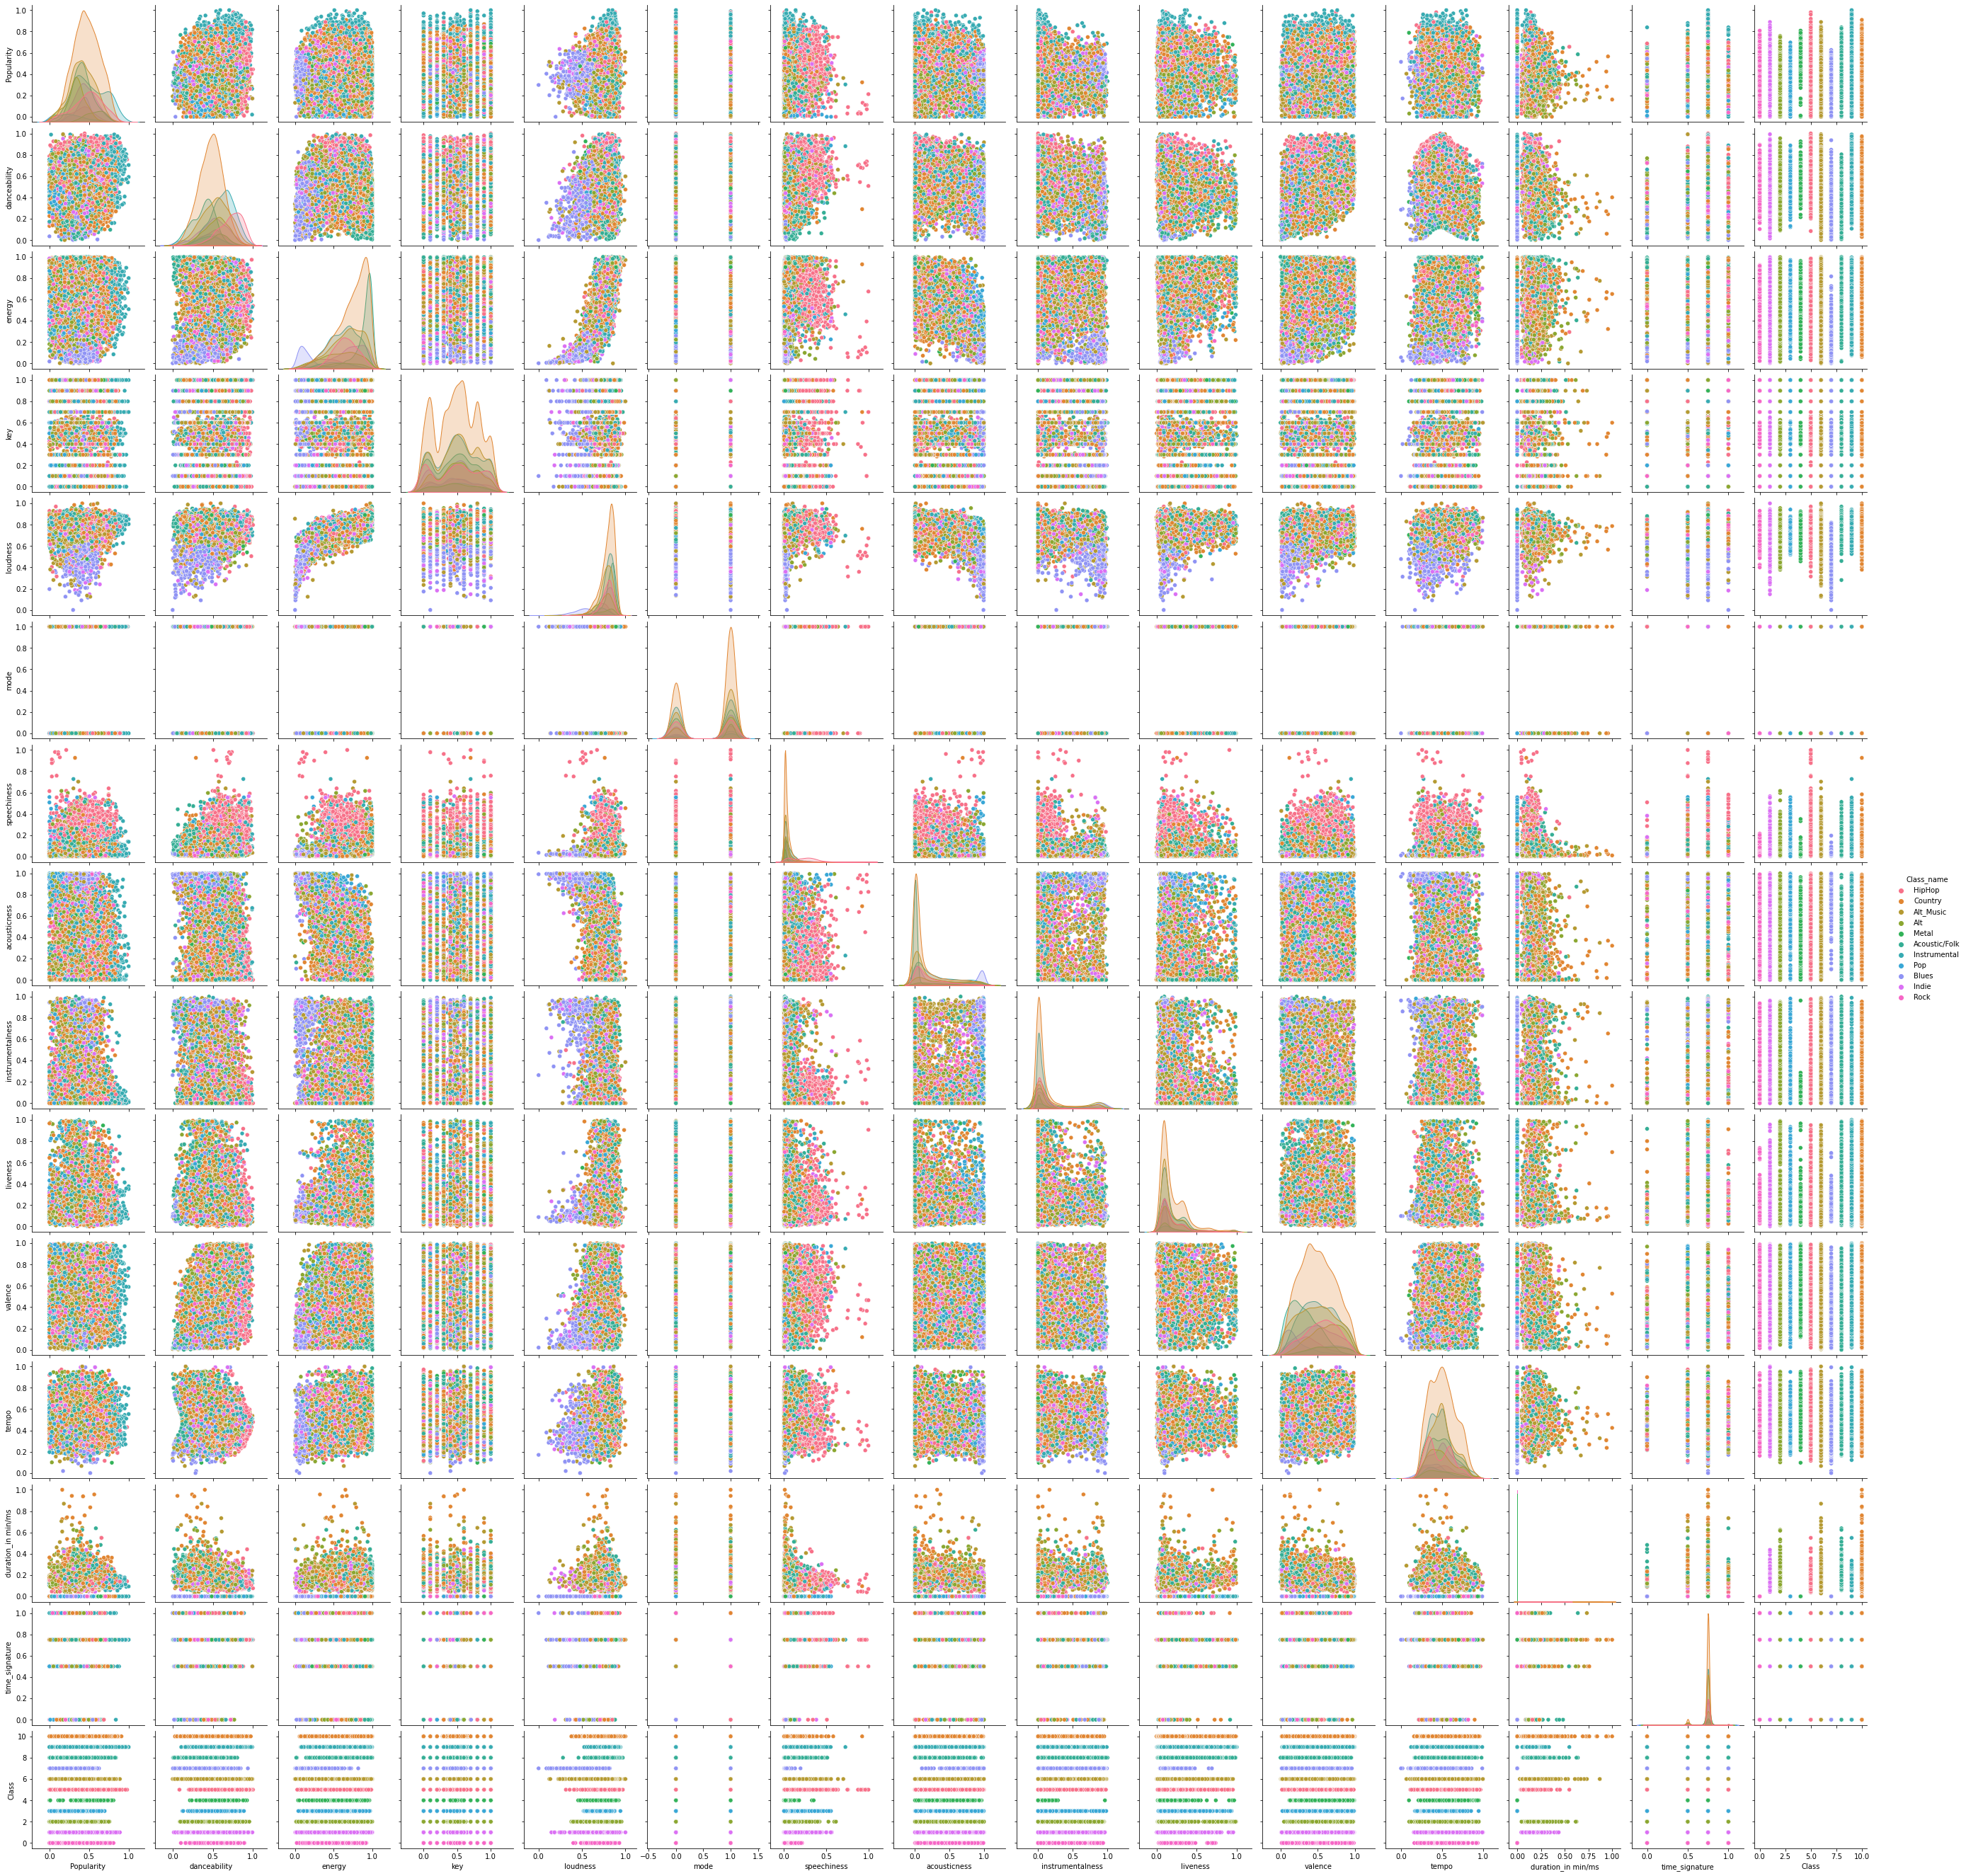

In [ ]:
sns.pairplot(dataset,hue='Class_name')

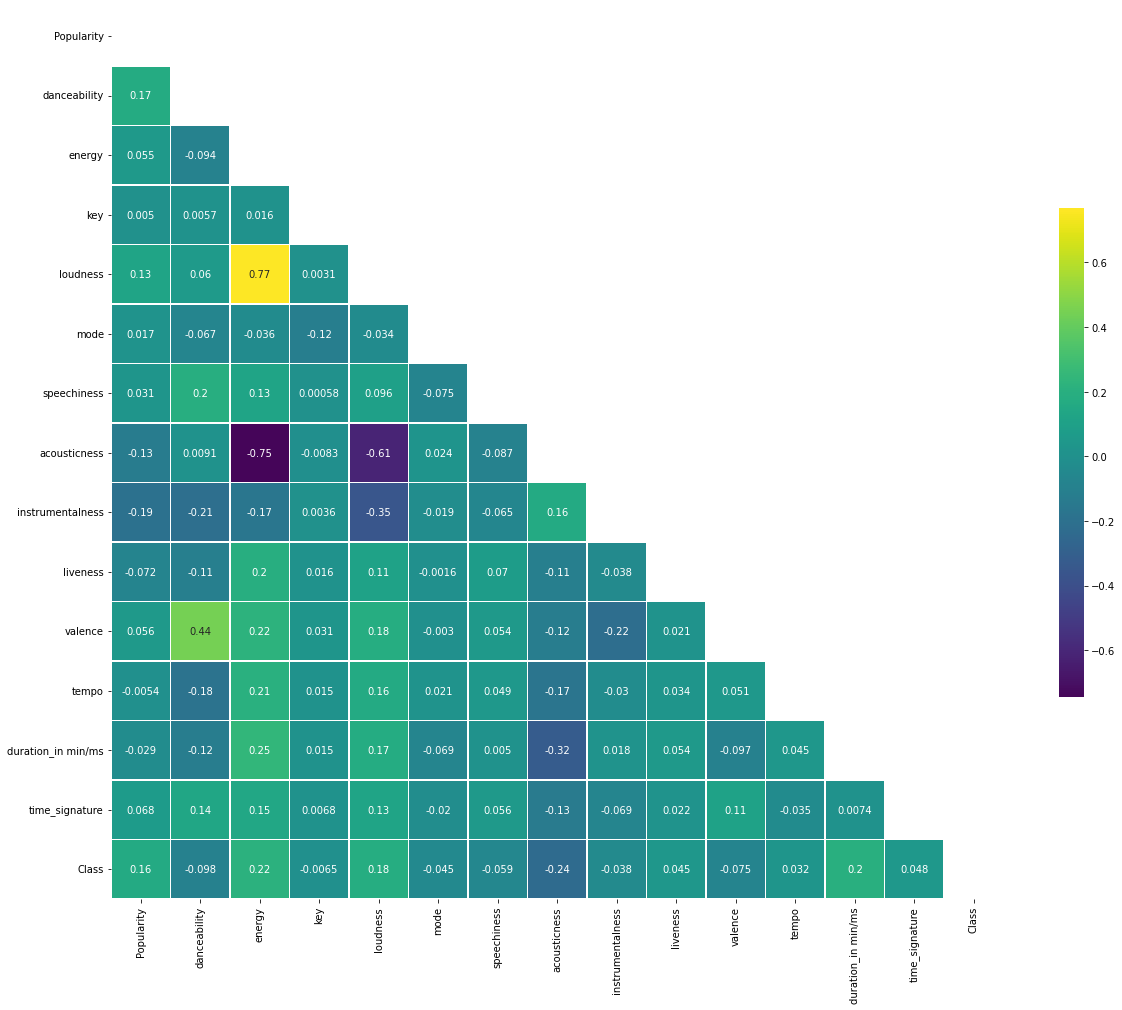

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,cmap="viridis",
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [ ]:
#scaler = MinMaxScaler()
#for col in cols:
#  df[col] = scaler.fit(df[col].values.reshape(-1,1))
#  dataset[col]=scaler.inverse_transform(dataset[col].values.reshape(-1,1))

In [ ]:
#dataset.to_csv('/content/drive/MyDrive/Sistemas Inteligentes/train_cleaned.csv',index=False)

## Modelos Base Line

### Separacion de datos en train y test

### Balanceo de clases

In [ ]:
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import TomekLinks,AllKNN
from imblearn.combine import SMOTEENN, SMOTETomek


def OverSample(df,cols,target_col,Tecnica,wanna_balanced):
  #cols    = [i for i in df.columns if i not in target_col]

  smote_X = df[cols]
  smote_Y = df[target_col]

  #Split train and test data
  smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(smote_X,smote_Y,test_size = .3,random_state=0 )
  #oversampling minority class using smote
  if wanna_balanced :
    os = Tecnica
    smote_train_X,smote_train_Y = os.fit_sample(smote_train_X,smote_train_Y)


  # Formato
  ## Train
  os_smote_train_X = pd.DataFrame(data = smote_train_X,columns=cols)

  os_smote_train_Y = pd.DataFrame(data = smote_train_Y,columns=[target_col])
  ## Test
  os_smote_test_X = pd.DataFrame(data = smote_test_X,columns=cols)

  os_smote_test_Y = pd.DataFrame(data = smote_test_Y,columns=[target_col])

  return os_smote_train_X,os_smote_test_X,os_smote_train_Y,os_smote_test_Y

train_X_NotText,test_X_NotText,train_y_NotText,test_y_NotText=OverSample(dataset,cols,target_col,SMOTETomek(),False)

In [ ]:
train_X_NotText,test_X_NotText,train_y_NotText,test_y_NotText = train_test_split(dataset[cols],dataset['Class'],test_size = .3,random_state=0 )
X_train_NotText,y_train_NotText = SMOTETomek().fit_sample(train_X_NotText,train_y_NotText)


In [ ]:
clfNB = MultinomialNB()
clfRF = RandomForestClassifier(random_state=0)

In [ ]:
clfNB.fit(train_X_NotText,train_y_NotText)
predictedNBTest = clfNB.predict(test_X_NotText)
print(metrics.classification_report([class_mapping[letter] for letter in test_y_NotText],[class_mapping[letter] for letter in predictedNBTest] ))

               precision    recall  f1-score   support

Acoustic/Folk       1.00      0.01      0.03       532
          Alt       0.00      0.00      0.00       394
    Alt_Music       0.40      0.09      0.15       767
        Blues       0.97      0.62      0.76       172
      Country       0.29      0.99      0.45      1463
       HipHop       1.00      0.00      0.01       465
        Indie       0.00      0.00      0.00       402
 Instrumental       0.18      0.01      0.02       771
        Metal       0.00      0.00      0.00       116
          Pop       0.00      0.00      0.00       121
         Rock       0.00      0.00      0.00       196

     accuracy                           0.30      5399
    macro avg       0.35      0.16      0.13      5399
 weighted avg       0.38      0.30      0.17      5399



In [ ]:
clfRF.fit(X_train_NotText,y_train_NotText)
predictedRFTest = clfRF.predict(test_X_NotText)
print(metrics.classification_report([class_mapping[letter] for letter in test_y_NotText],[class_mapping[letter] for letter in predictedRFTest] ))

               precision    recall  f1-score   support

Acoustic/Folk       0.53      0.67      0.59       532
          Alt       0.39      0.59      0.47       394
    Alt_Music       0.28      0.23      0.26       767
        Blues       0.93      0.92      0.93       172
      Country       0.48      0.37      0.42      1463
       HipHop       0.65      0.77      0.71       465
        Indie       0.05      0.05      0.05       402
 Instrumental       0.52      0.47      0.49       771
        Metal       0.59      0.78      0.68       116
          Pop       0.75      0.80      0.78       121
         Rock       0.65      0.79      0.71       196

     accuracy                           0.47      5399
    macro avg       0.53      0.59      0.55      5399
 weighted avg       0.47      0.47      0.46      5399



# Red Neuronal


## Primer intento

En este intento se uso la libreria de autokeras para encontrar un buen resultado "automatico", donde la arquitectura de la red neuronal la define la libreria por si misma.

Se tiene que resaltar que la busqueda es un grid search exhaustivo, lo cual busca muchas opciones para encontrar el mejor resultado.

In [ ]:
def Compresion(lst):
  return np.argmax(lst)

In [ ]:
search1 = StructuredDataClassifier(max_trials = 10,overwrite=True)

In [ ]:
clfsearch1=search1.fit(x=train_X_NotText, y=train_y_NotText,epochs=20,validation_data = (test_X_NotText, test_y_NotText) )

Trial 10 Complete [00h 00m 32s]
val_accuracy: 0.5097240209579468

Best val_accuracy So Far: 0.5130579471588135
Total elapsed time: 00h 04m 39s
INFO:tensorflow:Oracle triggered exit
Epoch 1/20
394/394 [==============================] - 2s 3ms/step - loss: 1.8868 - accuracy: 0.3476 - val_loss: 1.6192 - val_accuracy: 0.4234
Epoch 2/20
394/394 [==============================] - 1s 3ms/step - loss: 1.5241 - accuracy: 0.4420 - val_loss: 1.4429 - val_accuracy: 0.4616
Epoch 3/20
394/394 [==============================] - 1s 3ms/step - loss: 1.4118 - accuracy: 0.4773 - val_loss: 1.3818 - val_accuracy: 0.4825
Epoch 4/20
394/394 [==============================] - 1s 2ms/step - loss: 1.3701 - accuracy: 0.4865 - val_loss: 1.3576 - val_accuracy: 0.4908
Epoch 5/20
394/394 [==============================] - 1s 3ms/step - loss: 1.3498 - accuracy: 0.4893 - val_loss: 1.3447 - val_accuracy: 0.4938
Epoch 6/20
394/394 [==============================] - 1s 2ms/step - loss: 1.3371 - accuracy: 0.4925 - val_los

In [ ]:
final_model=clfsearch1.model
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 14)]              0         
_________________________________________________________________
multi_category_encoding (Mul (None, 14)                0         
_________________________________________________________________
normalization (Normalization (None, 14)                29        
_________________________________________________________________
dense (Dense)                (None, 32)                480       
_________________________________________________________________
re_lu (ReLU)                 (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 16)                0     

In [ ]:
prediccionRed = final_model.predict(test_X_NotText)
predicted_y=[*map(Compresion,prediccionRed)]
print(metrics.classification_report(test_y_NotText,predicted_y))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66       196
           1       0.44      0.01      0.02       402
           2       0.55      0.23      0.33       394
           3       0.70      0.64      0.67       121
           4       0.55      0.49      0.52       116
           5       0.69      0.66      0.68       465
           6       0.45      0.22      0.30       767
           7       0.89      0.91      0.90       172
           8       0.57      0.47      0.51       532
           9       0.45      0.55      0.49       771
          10       0.44      0.72      0.55      1463

    accuracy                           0.51      5399
   macro avg       0.58      0.51      0.51      5399
weighted avg       0.51      0.51      0.47      5399



## Segundo intento de redes neuronales

Busqueda manual, en esta parte se hizo una busqueda más empirica de las variables que pueden afectar.

## Binarización de las variables de respuesta

In [ ]:

y_test_onehot = preprocessing.label_binarize(test_y_NotText, classes=[0,1,2,3,4,5,6,7,8,9,10])
y_train_onehot = preprocessing.label_binarize(train_y_NotText, classes=[0,1,2,3,4,5,6,7,8,9,10])

## Arquitectura de la red neuronal

In [ ]:


input_dim = X_train_NotText.shape[1] # Para obtener el número de features.
# Primero el tipo de modelo
def modelo_red(X,y, opt = 'adam', act = 'relu',num_neuns = 32):
    
    """
    Retorna una arquitectura
    de red
    """
    #layers.Dropout(0.5), #Ponerle ruido a la red
    model = keras.Sequential()
    model.add(Dense(num_neuns , activation=act, input_shape=[X.shape[1]]))
    model.add(Dense(num_neuns ,activation = act))
    model.add(Dropout(0.1))
    #model.add(Dense(activation = act))
    model.add(Dense(y.shape[1] ,activation = 'softmax'))
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model



In [ ]:
modelo = modelo_red(X_train_NotText,y_test_onehot,act = 'relu',num_neuns=28)
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout (Dropout)            (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 11)                319       
Total params: 1,551
Trainable params: 1,551
Non-trainable params: 0
_________________________________________________________________


In [ ]:

bl=0.7
# Early Stopping
early_stopping = EarlyStopping(verbose=1, 
                               patience=10, 
                               baseline = bl, 
                               restore_best_weights = True)

In [ ]:
entrenamiento = modelo.fit(train_X_NotText,
                           y_train_onehot,
                           epochs=100,
                           validation_data = (test_X_NotText, y_test_onehot),
                           batch_size = 4,
                           callbacks=[early_stopping],
                           verbose =True
                          )

Epoch 1/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2573 - accuracy: 0.3360 - val_loss: 0.2229 - val_accuracy: 0.4227
Epoch 2/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2195 - accuracy: 0.4275 - val_loss: 0.2067 - val_accuracy: 0.4569
Epoch 3/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2075 - accuracy: 0.4580 - val_loss: 0.2007 - val_accuracy: 0.4719
Epoch 4/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2026 - accuracy: 0.4662 - val_loss: 0.1974 - val_accuracy: 0.4777
Epoch 5/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.1999 - accuracy: 0.4730 - val_loss: 0.1957 - val_accuracy: 0.4814
Epoch 6/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.1983 - accuracy: 0.4786 - val_loss: 0.1943 - val_accuracy: 0.4912
Epoch 7/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.1974 - accuracy: 0.4804 - val_loss: 0.1933 - val_ac

KeyboardInterrupt: ignored

In [ ]:
prediccionRed = modelo.predict(test_X_NotText)
predicted_y=[*map(Compresion,prediccionRed)]
print(metrics.classification_report(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       196
           1       0.56      0.01      0.02       402
           2       0.44      0.45      0.44       394
           3       0.74      0.69      0.71       121
           4       0.60      0.61      0.60       116
           5       0.64      0.72      0.68       465
           6       0.41      0.26      0.32       767
           7       0.91      0.92      0.92       172
           8       0.70      0.43      0.53       532
           9       0.51      0.51      0.51       771
          10       0.47      0.72      0.57      1463

    accuracy                           0.53      5399
   macro avg       0.60      0.55      0.55      5399
weighted avg       0.54      0.53      0.50      5399



## Tercer intento

Usando la libreria de `keras.tuner` se planteo hacer una busqueda de hiperparametros mas sectorizado

In [ ]:
[train_X_NotText.shape[1]]

[14]

In [ ]:
def modelo_tunner(hp):
    
    """
    Retorna una arquitectura
    de red
    """
    #layers.Dropout(0.5), #Ponerle ruido a la red
    model = keras.Sequential()
    hp_units = hp.Int('first_layer', min_value=4, max_value=64, step=2)
    hp_activation = hp.Choice('activation', values=['relu','tanh','softmax'])
    model.add(Dense(units=hp_units , activation=hp_activation, input_shape=[14]))
    hp_units2 = hp.Int('second_layer', min_value=4, max_value=64, step=2)
    hp_activation2 = hp.Choice('activation', values=['relu','tanh','softmax'])
    model.add(Dense(units=hp_units2,activation = hp_activation2))
    hp_dropout = hp.Float('dropout', min_value=0, max_value=0.8, step=0.1)
    model.add(Dropout(rate=hp_dropout))
    model.add(Dense(units=hp_units ,activation = 'relu'))
    model.add(Dense(11 ,activation = 'relu'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3, 1e-4])
    model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=hp_learning_rate), metrics=['accuracy'])
    return model



### Creación de buscador de grilla

In [ ]:
tuner = kt.Hyperband(modelo_tunner,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     project_name='Shazam')


In [ ]:
stop_early = EarlyStopping(monitor='val_loss', patience=5)

### Entrenamiento

In [ ]:
tuner.search(train_X_NotText,
            y_train_onehot, 
             epochs=50,
             validation_data = (test_X_NotText, y_test_onehot), 
             callbacks=[stop_early]) 

Trial 44 Complete [00h 00m 05s]
val_accuracy: 0.27097609639167786

Best val_accuracy So Far: 0.43656232953071594
Total elapsed time: 00h 10m 17s
INFO:tensorflow:Oracle triggered exit


 Mejor modelo

In [ ]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


In [ ]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_X_NotText,y_train_onehot, epochs=100,batch_size=4,  validation_data = (test_X_NotText, y_test_onehot),callbacks=[stop_early])

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/100
3150/3150 [==============================] - 7s 2ms/step - loss: 0.5458 - accuracy: 0.2593 - val_loss: 0.3061 - val_accuracy: 0.3373
Epoch 2/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.3209 - accuracy: 0.3109 - val_loss: 0.2715 - val_accuracy: 0.3640
Epoch 3/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.3091 - accuracy: 0.3388 - val_loss: 0.3027 - val_accuracy: 0.2882
Epoch 4/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.3040 - accuracy: 0.3464 - val_loss: 0.2615 - val_accuracy: 0.4079
Epoch 5/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2853 - accuracy: 0.3716 - val_loss: 0.2579 - val_accuracy: 0.4017
Epoch 6/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.2841 - accuracy: 0.3795 - val_loss: 0.2529 - val_accuracy: 0.4062
Epoch 7/100
3150/3150 [==============================] - 6s 2ms/step - loss: 0.3099 - accuracy: 0.3779 - val_loss: 0.2519 - val_ac

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(train_X,y_train_onehot, epochs=best_epoch, validation_data = (test_X, y_test_onehot))

Epoch 1/7
394/394 [==============================] - 6s 12ms/step - loss: 0.3894 - accuracy: 0.2490 - val_loss: 0.3029 - val_accuracy: 0.3151
Epoch 2/7
394/394 [==============================] - 5s 12ms/step - loss: 0.2946 - accuracy: 0.3490 - val_loss: 0.2559 - val_accuracy: 0.3645
Epoch 3/7
394/394 [==============================] - 5s 12ms/step - loss: 0.2644 - accuracy: 0.4204 - val_loss: 0.2683 - val_accuracy: 0.3843
Epoch 4/7
394/394 [==============================] - 5s 12ms/step - loss: 0.2484 - accuracy: 0.4712 - val_loss: 0.2431 - val_accuracy: 0.4280
Epoch 5/7
394/394 [==============================] - 5s 12ms/step - loss: 0.2130 - accuracy: 0.5543 - val_loss: 0.2699 - val_accuracy: 0.4753
Epoch 6/7
394/394 [==============================] - 5s 12ms/step - loss: 0.1995 - accuracy: 0.6162 - val_loss: 0.2995 - val_accuracy: 0.4805
Epoch 7/7
394/394 [==============================] - 5s 12ms/step - loss: 0.1838 - accuracy: 0.6708 - val_loss: 0.3612 - val_accuracy: 0.4829


In [ ]:
prediccionRed = hypermodel.predict(test_X)
predicted_y=[*map(Compresion,prediccionRed)]
print(metrics.classification_report(test_y,predicted_y))

              precision    recall  f1-score   support

           0       0.63      0.14      0.23       196
           1       0.06      0.00      0.01       402
           2       0.42      0.52      0.46       394
           3       0.94      0.84      0.89       121
           4       0.67      0.31      0.42       116
           5       0.72      0.55      0.62       465
           6       0.30      0.39      0.34       767
           7       0.89      0.38      0.53       172
           8       0.55      0.47      0.50       532
           9       0.65      0.52      0.58       771
          10       0.44      0.66      0.53      1463

    accuracy                           0.48      5399
   macro avg       0.57      0.43      0.47      5399
weighted avg       0.49      0.48      0.47      5399



# Experimentos de variables

### Recursive Features Extraction

In [ ]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=clfRF, n_features_to_select=1, step=1) # in this example we will select 20 variables; this number "20" is a hyperparameter to tune
rfe.fit(X_train_NotText, y_train_NotText)
ranking = rfe.ranking_.reshape(len(dataset[cols].columns))

# Cuáles son las 20 variables que quedan en el modelo?
rankking=pd.DataFrame([dataset[cols].columns,ranking]).transpose().sort_values(1)
rankking.columns=['variable','ranking']
rankking

variable ranking
12  duration_in min/ms       1
7         acousticness       2
2               energy       3
0           Popularity       4
6          speechiness       5
4             loudness       6
10             valence       7
8     instrumentalness       8
1         danceability       9
9             liveness      10
11               tempo      11
3                  key      12
5                 mode      13
13      time_signature      14

In [ ]:
rankking.variable.to_list()

['duration_in min/ms',
 'acousticness',
 'energy',
 'Popularity',
 'speechiness',
 'loudness',
 'valence',
 'instrumentalness',
 'danceability',
 'liveness',
 'tempo',
 'key',
 'mode',
 'time_signature']

In [ ]:
cols_filtered=['duration_in min/ms','acousticness','energy',
 'Popularity','speechiness','loudness',
 'valence','instrumentalness','danceability',
 'liveness','tempo','key',
 'mode','time_signature'
 ]



In [ ]:
train_X_filtered,test_X_filtered,train_y_filtered,test_y_filtered = train_test_split(dataset[cols_filtered],dataset['Class'],test_size = .3,random_state=0 )
X_train_filtered,y_train_filtered = SMOTETomek().fit_sample(train_X_filtered,train_y_filtered)

In [ ]:
clfRF.fit(X_train_filtered,y_train_filtered)
predictedRFTest = clfRF.predict(test_X_filtered)
print(metrics.classification_report(test_y_filtered,predictedRFTest ))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71       196
           1       0.12      0.29      0.17       402
           2       0.30      0.72      0.42       394
           3       0.71      0.81      0.76       121
           4       0.51      0.81      0.63       116
           5       0.58      0.82      0.68       465
           6       0.33      0.12      0.17       767
           7       0.94      0.93      0.93       172
           8       0.40      0.86      0.55       532
           9       0.49      0.41      0.45       771
          10       0.17      0.00      0.00      1463

    accuracy                           0.40      5399
   macro avg       0.47      0.60      0.50      5399
weighted avg       0.36      0.40      0.33      5399



### PCA

In [ ]:

#correlation
correlation = dataset[cols].corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = " Matrix Correlaccion Matrix for variables",
                        autosize = True,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
PCAS=pca.fit_transform(dataset[cols])
principalDf = pd.DataFrame(data = PCAS)
Data={'Standard deviation':
np.sqrt(pca.explained_variance_),
'Proportion of variance': pca.explained_variance_ratio_,
'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)}
pcsSummary = pd.DataFrame(data=Data)
pcsSummary

Standard deviation  Proportion of variance  Cumulative proportion
0            0.483741                0.309867               0.309867
1            0.390089                0.201501               0.511369
2            0.298965                0.118356               0.629725
3            0.289803                0.111213               0.740938
4            0.235037                0.073152               0.814090

In [ ]:
principal_components = pca.fit_transform(dataset[cols])
pcas=pd.DataFrame(principal_components,columns = ["PC1","PC2","PC3","PC4","PC5"])
pcas


PC1       PC2       PC3       PC4       PC5
0     -0.397848 -0.283138  0.382869 -0.426049  0.330906
1     -0.382743 -0.336027  0.254532 -0.032552 -0.065785
2     -0.372964  0.057648 -0.105811 -0.262787  0.085300
3      0.695973 -0.165507 -0.346956 -0.168575  0.020871
4     -0.398868 -0.361791  0.426491  0.363856 -0.438702
...         ...       ...       ...       ...       ...
17991  0.568827  1.190803  0.004680  0.467594  0.078890
17992  0.646374  0.754847 -0.470572 -0.251815 -0.231265
17993  0.631637 -0.331293  0.307261  0.129601 -0.233788
17994  0.640200  0.062864  0.174609  0.801995  0.354120
17995  0.620956 -0.216081  0.310331  0.225599 -0.067695

[17996 rows x 5 columns]

In [ ]:

#correlation
correlation = pd.concat([dataset,pcas],axis=1).corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = " Matrix Correlaccion Matrix for variables",
                        autosize = True,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

In [ ]:
train_X_pcas,test_X_pcas,train_y_pcas,test_y_pcas = train_test_split(pd.concat([dataset[cols],pcas],axis=1),dataset['Class'],test_size = .3,random_state=0 )
X_train_pcas,y_train_pcas = SMOTETomek().fit_sample(train_X_pcas,train_y_pcas)

In [ ]:
clfRF.fit(X_train_pcas,y_train_pcas)
predictedRFTest = clfRF.predict(test_X_pcas)
print(metrics.classification_report(test_y_pcas,predictedRFTest ))

              precision    recall  f1-score   support

           0       0.63      0.76      0.69       196
           1       0.06      0.06      0.06       402
           2       0.38      0.56      0.45       394
           3       0.74      0.81      0.77       121
           4       0.56      0.77      0.64       116
           5       0.65      0.76      0.70       465
           6       0.28      0.24      0.26       767
           7       0.94      0.92      0.93       172
           8       0.54      0.67      0.60       532
           9       0.48      0.46      0.47       771
          10       0.47      0.36      0.41      1463

    accuracy                           0.46      5399
   macro avg       0.52      0.58      0.54      5399
weighted avg       0.46      0.46      0.46      5399



### Incluyendo texto

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,2))
matrizCV_Artist=vectorizer.fit_transform(dataset['Artist Name'])
matrizCV_Track=vectorizer.fit_transform(dataset['Track Name'])

In [ ]:
import scipy as sp

rythm_variables=sp.sparse.vstack((sp.sparse.csr_matrix(dataset[cols])))

df_matriz = sp.sparse.hstack((matrizCV_Artist,matrizCV_Track,rythm_variables))

In [ ]:
df_matriz

<17996x50625 sparse matrix of type '<class 'numpy.float64'>'
	with 379927 stored elements in COOrdinate format>

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(df_matriz,dataset['Class'],test_size = .3,random_state=0 )
X_train,y_train = SMOTETomek().fit_sample(train_X,train_y)


clfRF.fit(X_train,y_train)
predictedRFTest = clfRF.predict(test_X)
print(metrics.classification_report(test_y,predictedRFTest ))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       196
           1       0.03      0.01      0.02       402
           2       0.70      0.30      0.42       394
           3       0.99      0.91      0.95       121
           4       0.92      0.72      0.81       116
           5       0.66      0.78      0.72       465
           6       0.29      0.34      0.31       767
           7       0.85      0.92      0.89       172
           8       0.60      0.65      0.63       532
           9       0.59      0.59      0.59       771
          10       0.50      0.56      0.53      1463

    accuracy                           0.53      5399
   macro avg       0.63      0.60      0.60      5399
weighted avg       0.53      0.53      0.52      5399



In [ ]:

bl=0.7
# Early Stopping
early_stopping = EarlyStopping(verbose=1, 
                               patience=10, 
                               baseline = bl, 
                               restore_best_weights = True)

In [ ]:
modelo = modelo_red(X_train,y_train_onehot,act = 'relu',num_neuns=100)
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               5062600   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                1111      
Total params: 5,073,811
Trainable params: 5,073,811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
entrenamiento = modelo.fit(train_X,
                           y_train_onehot,
                           epochs=100,
                           validation_data = (test_X, y_test_onehot),
                           batch_size = 4,
                           callbacks=[early_stopping],
                           verbose =True
                          )

Epoch 1/100
3150/3150 [==============================] - 165s 52ms/step - loss: 0.2211 - accuracy: 0.4460 - val_loss: 0.1763 - val_accuracy: 0.5651
Epoch 2/100
3150/3150 [==============================] - 165s 52ms/step - loss: 0.1083 - accuracy: 0.7664 - val_loss: 0.1795 - val_accuracy: 0.5805
Epoch 3/100
3150/3150 [==============================] - 168s 53ms/step - loss: 0.0620 - accuracy: 0.8611 - val_loss: 0.2022 - val_accuracy: 0.5536
Epoch 4/100
3150/3150 [==============================] - 167s 53ms/step - loss: 0.0453 - accuracy: 0.8878 - val_loss: 0.2483 - val_accuracy: 0.5392
Epoch 5/100
3150/3150 [==============================] - 168s 53ms/step - loss: 0.0369 - accuracy: 0.8957 - val_loss: 0.2756 - val_accuracy: 0.5477
Epoch 6/100
3150/3150 [==============================] - 176s 56ms/step - loss: 0.0310 - accuracy: 0.8998 - val_loss: 0.3079 - val_accuracy: 0.5579
Epoch 7/100
3150/3150 [==============================] - 173s 55ms/step - loss: 0.0279 - accuracy: 0.9043 - val_

In [ ]:
prediccionRed = modelo.predict(test_X)
predicted_y=[*map(Compresion,prediccionRed)]
print(metrics.classification_report([class_mapping[letter] for letter in test_y],[class_mapping[letter] for letter in predicted_y] ))

               precision    recall  f1-score   support

Acoustic/Folk       0.65      0.56      0.60       532
          Alt       0.41      0.73      0.52       394
    Alt_Music       0.41      0.32      0.36       767
        Blues       0.85      0.94      0.89       172
      Country       0.53      0.68      0.60      1463
       HipHop       0.69      0.80      0.74       465
        Indie       0.00      0.00      0.00       402
 Instrumental       0.64      0.56      0.60       771
        Metal       0.97      0.25      0.40       116
          Pop       0.83      0.94      0.88       121
         Rock       0.65      0.55      0.60       196

     accuracy                           0.57      5399
    macro avg       0.60      0.58      0.56      5399
 weighted avg       0.54      0.57      0.54      5399



#### Variante con pca y texto

In [ ]:
rythm_variables=sp.sparse.vstack((sp.sparse.csr_matrix(pd.concat([dataset[cols],pcas],axis=1))))

df_matriz = sp.sparse.hstack((matrizCV_Artist,matrizCV_Track,rythm_variables))

In [ ]:
train_X,test_X,train_y,test_y = train_test_split(df_matriz,dataset['Class'],test_size = .3,random_state=0 )
X_train,y_train = TomekLinks().fit_sample(train_X,train_y)

In [ ]:
clfRF.fit(X_train,y_train)
predictedRFTest = clfRF.predict(test_X)
print(metrics.classification_report(test_y,predictedRFTest ))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       196
           1       0.02      0.00      0.01       402
           2       0.59      0.34      0.43       394
           3       0.91      0.79      0.85       121
           4       0.67      0.71      0.69       116
           5       0.70      0.70      0.70       465
           6       0.33      0.25      0.28       767
           7       0.91      0.92      0.92       172
           8       0.63      0.53      0.58       532
           9       0.57      0.55      0.56       771
          10       0.46      0.69      0.55      1463

    accuracy                           0.53      5399
   macro avg       0.59      0.57      0.57      5399
weighted avg       0.51      0.53      0.51      5399



In [ ]:

bl=0.7
# Early Stopping
early_stopping = EarlyStopping(verbose=1, 
                               patience=10, 
                               baseline = bl, 
                               restore_best_weights = True)

In [ ]:
modelo = modelo_red(train_X,y_test_onehot,act = 'relu',num_neuns=100)
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 100)               5062600   
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 11)                1111      
Total params: 5,073,811
Trainable params: 5,073,811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
entrenamiento = modelo.fit(train_X,
                           y_train_onehot,
                           epochs=100,
                           validation_data = (test_X, y_test_onehot),
                           batch_size = 4,
                           callbacks=[early_stopping],
                           verbose =True
                          )

Epoch 1/100
3150/3150 [==============================] - 165s 52ms/step - loss: 0.2211 - accuracy: 0.4460 - val_loss: 0.1763 - val_accuracy: 0.5651
Epoch 2/100
3150/3150 [==============================] - 165s 52ms/step - loss: 0.1083 - accuracy: 0.7664 - val_loss: 0.1795 - val_accuracy: 0.5805
Epoch 3/100
3150/3150 [==============================] - 168s 53ms/step - loss: 0.0620 - accuracy: 0.8611 - val_loss: 0.2022 - val_accuracy: 0.5536
Epoch 4/100
3150/3150 [==============================] - 167s 53ms/step - loss: 0.0453 - accuracy: 0.8878 - val_loss: 0.2483 - val_accuracy: 0.5392
Epoch 5/100
3150/3150 [==============================] - 168s 53ms/step - loss: 0.0369 - accuracy: 0.8957 - val_loss: 0.2756 - val_accuracy: 0.5477
Epoch 6/100
3150/3150 [==============================] - 176s 56ms/step - loss: 0.0310 - accuracy: 0.8998 - val_loss: 0.3079 - val_accuracy: 0.5579
Epoch 7/100
3150/3150 [==============================] - 173s 55ms/step - loss: 0.0279 - accuracy: 0.9043 - val_

In [ ]:
prediccionRed = modelo.predict(test_X)
predicted_y=[*map(Compresion,prediccionRed)]
print(metrics.classification_report([class_mapping[letter] for letter in test_y],[class_mapping[letter] for letter in predicted_y] ))

               precision    recall  f1-score   support

Acoustic/Folk       0.65      0.56      0.60       532
          Alt       0.41      0.73      0.52       394
    Alt_Music       0.41      0.32      0.36       767
        Blues       0.85      0.94      0.89       172
      Country       0.53      0.68      0.60      1463
       HipHop       0.69      0.80      0.74       465
        Indie       0.00      0.00      0.00       402
 Instrumental       0.64      0.56      0.60       771
        Metal       0.97      0.25      0.40       116
          Pop       0.83      0.94      0.88       121
         Rock       0.65      0.55      0.60       196

     accuracy                           0.57      5399
    macro avg       0.60      0.58      0.56      5399
 weighted avg       0.54      0.57      0.54      5399

